# Educação dos pais e desempenho escolar da criança

### Paulo Roberto Carneiro de Sá

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import rcParams
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl

In [2]:
clist = ['#dbe2e4', '#44c8de', '#1d86ca', '#286b98','#13386e','#536c72',  '#554f5b',  '#a850cb','#a17c63']
scara = LinearSegmentedColormap.from_list('wanderer', clist)
mpl.colormaps.register(cmap=scara)

In [3]:
dados = pd.read_csv("graduation_rate.csv", sep = ',')
dados

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6
...,...,...,...,...,...,...,...
995,32,2234,some college,30658,4.0,3.0,10
996,27,1930,some college,59443,3.6,3.2,4
997,32,2117,associate's degree,94415,4.0,3.8,4
998,32,2034,some high school,31713,3.9,3.2,8


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ACT composite score          1000 non-null   int64  
 1   SAT total score              1000 non-null   int64  
 2   parental level of education  1000 non-null   object 
 3   parental income              1000 non-null   int64  
 4   high school gpa              1000 non-null   float64
 5   college gpa                  1000 non-null   float64
 6   years to graduate            1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB


### Traduzindo os termos para o Português

In [5]:

# Criando um dicionário com o mapeamento dos nomes das colunas
mapeamento = {
    'ACT composite score': 'Pontuação composta no ACT',
    'SAT total score': 'Pontuação total no SAT',
    'parental level of education': 'Nível de educação dos pais',
    'parental income': 'Renda dos pais',
    'high school gpa': 'GPA do ensino médio',
    'college gpa': 'GPA da faculdade',
    'years to graduate': 'Anos para se formar'
}

# Use o método rename para traduzir os nomes das colunas
dados = dados.rename(columns=mapeamento)

# Exiba o DataFrame atualizado
display(dados)

,Pontuação composta no ACT,Pontuação total no SAT,Nível de educação dos pais,Renda dos pais,GPA do ensino médio,GPA da faculdade,Anos para se formar
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6
...,...,...,...,...,...,...,...
995,32,2234,some college,30658,4.0,3.0,10
996,27,1930,some college,59443,3.6,3.2,4
997,32,2117,associate's degree,94415,4.0,3.8,4
998,32,2034,some high school,31713,3.9,3.2,8


In [6]:
dados.nunique()

Pontuação composta no ACT      17
Pontuação total no SAT        474
Nível de educação dos pais      6
Renda dos pais                992
GPA do ensino médio            13
GPA da faculdade               15
Anos para se formar             8
dtype: int64

In [7]:
contagem_nivel_educacao = dados['Nível de educação dos pais'].value_counts()
print(contagem_nivel_educacao)

some college          232
high school           207
some high school      180
associate's degree    176
bachelor's degree     124
master's degree        81
Name: Nível de educação dos pais, dtype: int64


In [8]:
mapeamento_nivel_educacao = {
    "some college": "Ensino superior incompleto",
    "high school": "Ensino médio",
    "some high school": "Alguns anos de ensino médio",
    "associate's degree": "Diploma de nível técnico",
    "bachelor's degree": "Bacharelado",
    "master's degree": "Mestrado"
}

dados['Nível de educação dos pais'] = dados['Nível de educação dos pais'].map(mapeamento_nivel_educacao)
print(dados['Nível de educação dos pais'])

0                     Ensino médio
1         Diploma de nível técnico
2                      Bacharelado
3         Diploma de nível técnico
4         Diploma de nível técnico
                  ...             
995     Ensino superior incompleto
996     Ensino superior incompleto
997       Diploma de nível técnico
998    Alguns anos de ensino médio
999                    Bacharelado
Name: Nível de educação dos pais, Length: 1000, dtype: object


In [9]:
display(dados)

,Pontuação composta no ACT,Pontuação total no SAT,Nível de educação dos pais,Renda dos pais,GPA do ensino médio,GPA da faculdade,Anos para se formar
0,22,1625,Ensino médio,40999,3.0,3.1,7
1,29,2090,Diploma de nível técnico,75817,4.0,3.4,5
2,30,2188,Bacharelado,82888,4.0,3.9,3
3,33,2151,Diploma de nível técnico,93518,4.0,3.7,5
4,29,2050,Diploma de nível técnico,79153,4.0,3.4,6
...,...,...,...,...,...,...,...
995,32,2234,Ensino superior incompleto,30658,4.0,3.0,10
996,27,1930,Ensino superior incompleto,59443,3.6,3.2,4
997,32,2117,Diploma de nível técnico,94415,4.0,3.8,4
998,32,2034,Alguns anos de ensino médio,31713,3.9,3.2,8


### Obtendo as correlações de atributos numéricos

In [10]:
sns.set_palette('wanderer')
rcParams['figure.figsize'] = 15,8

<AxesSubplot:>

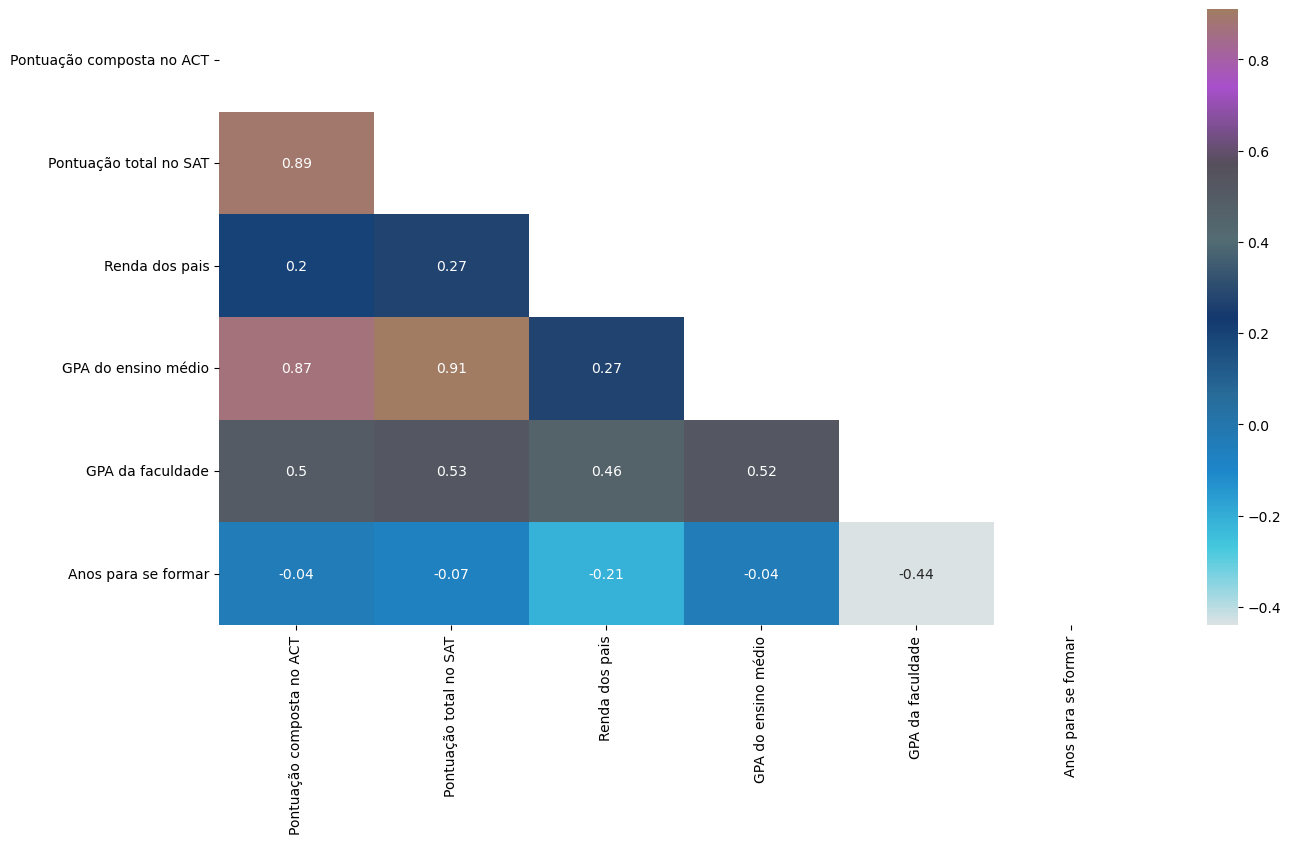

In [11]:
matrix = dados.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, mask = mask, cmap='wanderer')

### Numero de pais em cada nivel de ensino

<AxesSubplot:xlabel='Nível de educação dos pais', ylabel='count'>

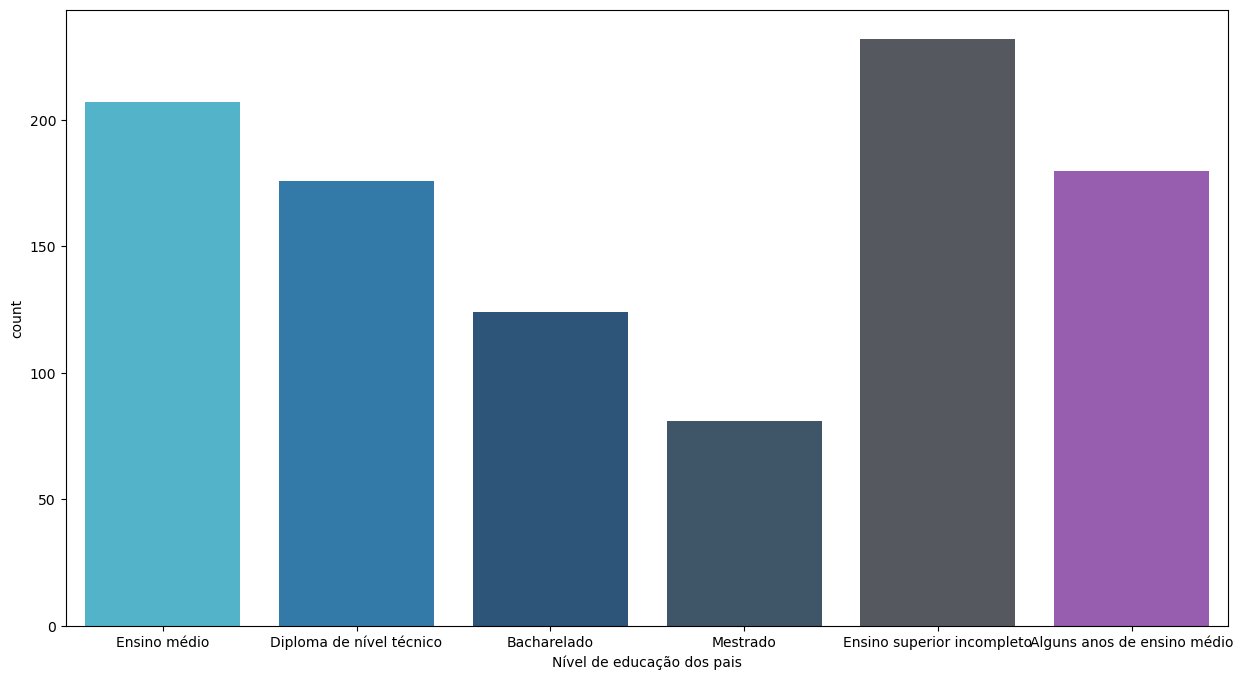

In [15]:
sns.countplot(x='Nível de educação dos pais', data = dados)

### Histórico educacional VS Renda

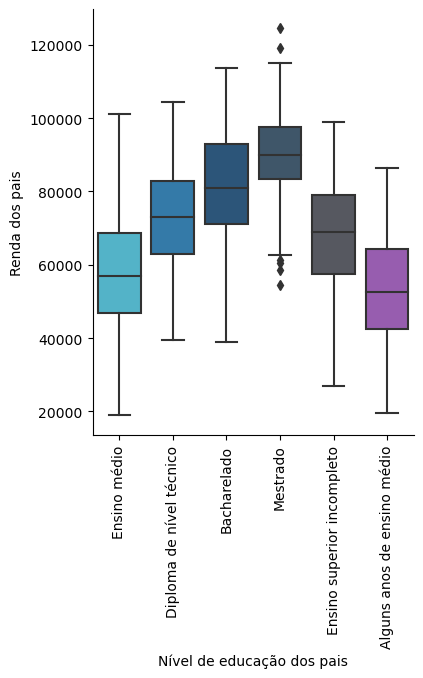

In [12]:
c = sns.catplot(data = dados, x='Nível de educação dos pais', y='Renda dos pais', kind='box')
c.set_xticklabels(rotation=90)
plt.show()

### Histórico educacional dos pais e pontuação composta do ACT infantil

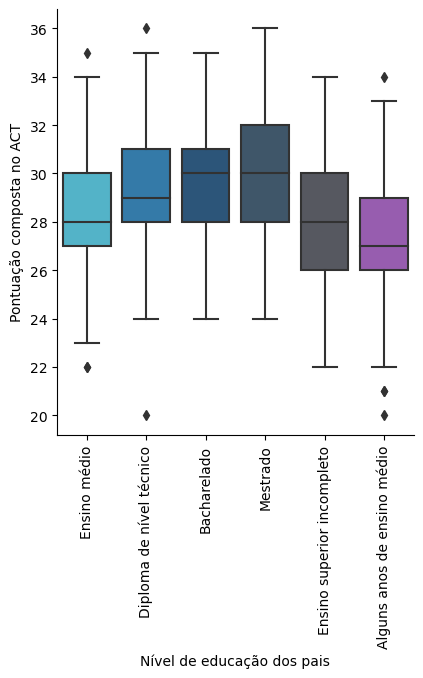

In [13]:
c = sns.catplot(data= dados, x='Nível de educação dos pais', y='Pontuação composta no ACT', kind='box')
c.set_xticklabels(rotation=90)
plt.show()

### Histórico educacional dos pais e pontuação SAT dos filhos

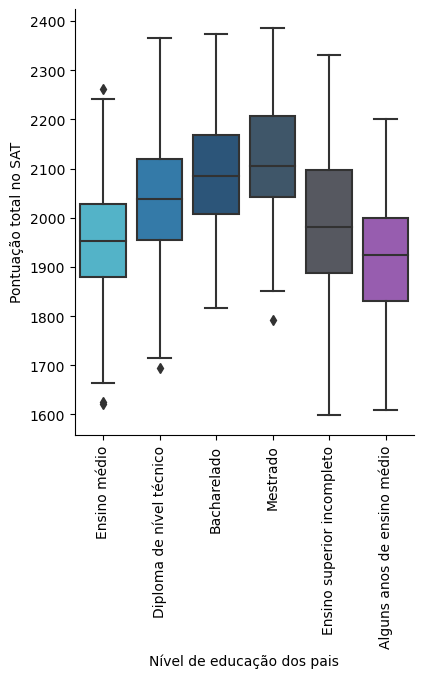

In [22]:
c = sns.catplot(data= dados, x='Nível de educação dos pais', y='Pontuação total no SAT', kind='box')
c.set_xticklabels(rotation=90)
plt.show()

### Nível de educação dos pais e GPA do ensino medio

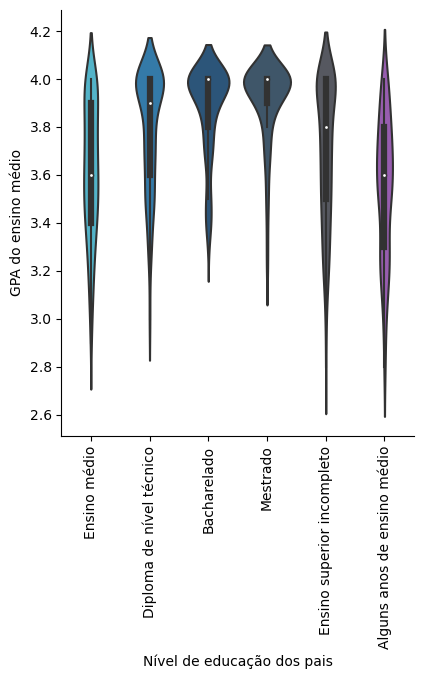

In [23]:
c = sns.catplot(data= dados, x='Nível de educação dos pais', y='GPA do ensino médio', kind='violin')
c.set_xticklabels(rotation=90)
plt.show()

### Histórico de Educação dos Pais VS. GPA da faculdade

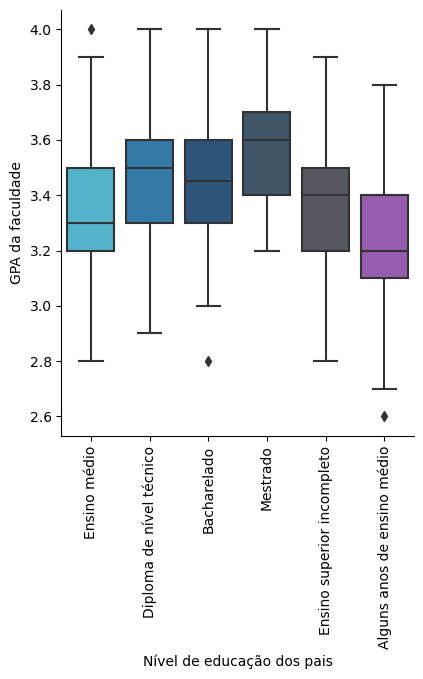

In [14]:
c = sns.catplot(data= dados, x='Nível de educação dos pais', y='GPA da faculdade', kind='box')
c.set_xticklabels(rotation=90)
plt.show()

### Histórico educacional dos pais vs. anos dos filhos para se formar

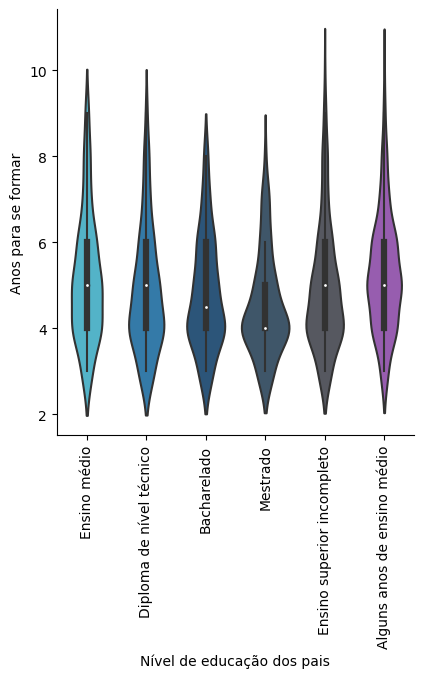

In [26]:
c = sns.catplot(data= dados, x='Nível de educação dos pais', y='Anos para se formar', kind='violin')
c.set_xticklabels(rotation=90)
plt.show()